In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from google.cloud import bigquery
bq = bigquery.Client()

In [74]:
%%bigquery df
SELECT * FROM data_chile.v_asistencia LIMIT 1000

Downloading: 100%|██████████| 1000/1000 [00:01<00:00, 959.48rows/s]


In [118]:
#df

In [119]:
#type(df)
#df.describe()

In [92]:
#Aqui se pueden aplicar filtros, por si fuera necesario
df = df[df['ASIS_PROMEDIO'] > 0]

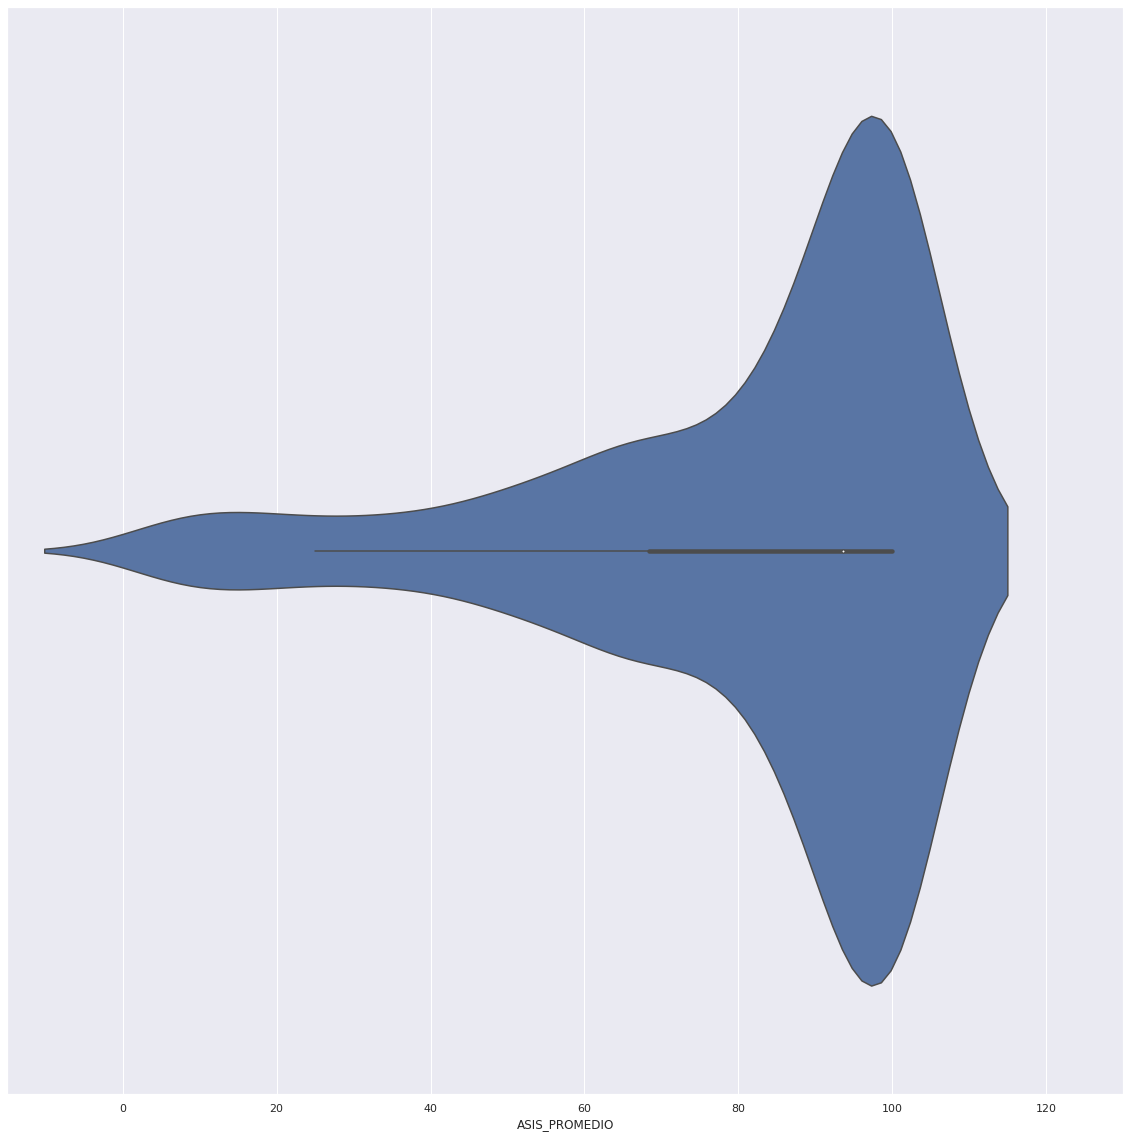

In [114]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(20, 20)})
ax = sns.violinplot(data=df, x='ASIS_PROMEDIO', inner='box', orient='h')
ax.axes.set_xlim(-15, 130);

array([[<AxesSubplot:title={'center':'ASIS_PROMEDIO'}>]], dtype=object)

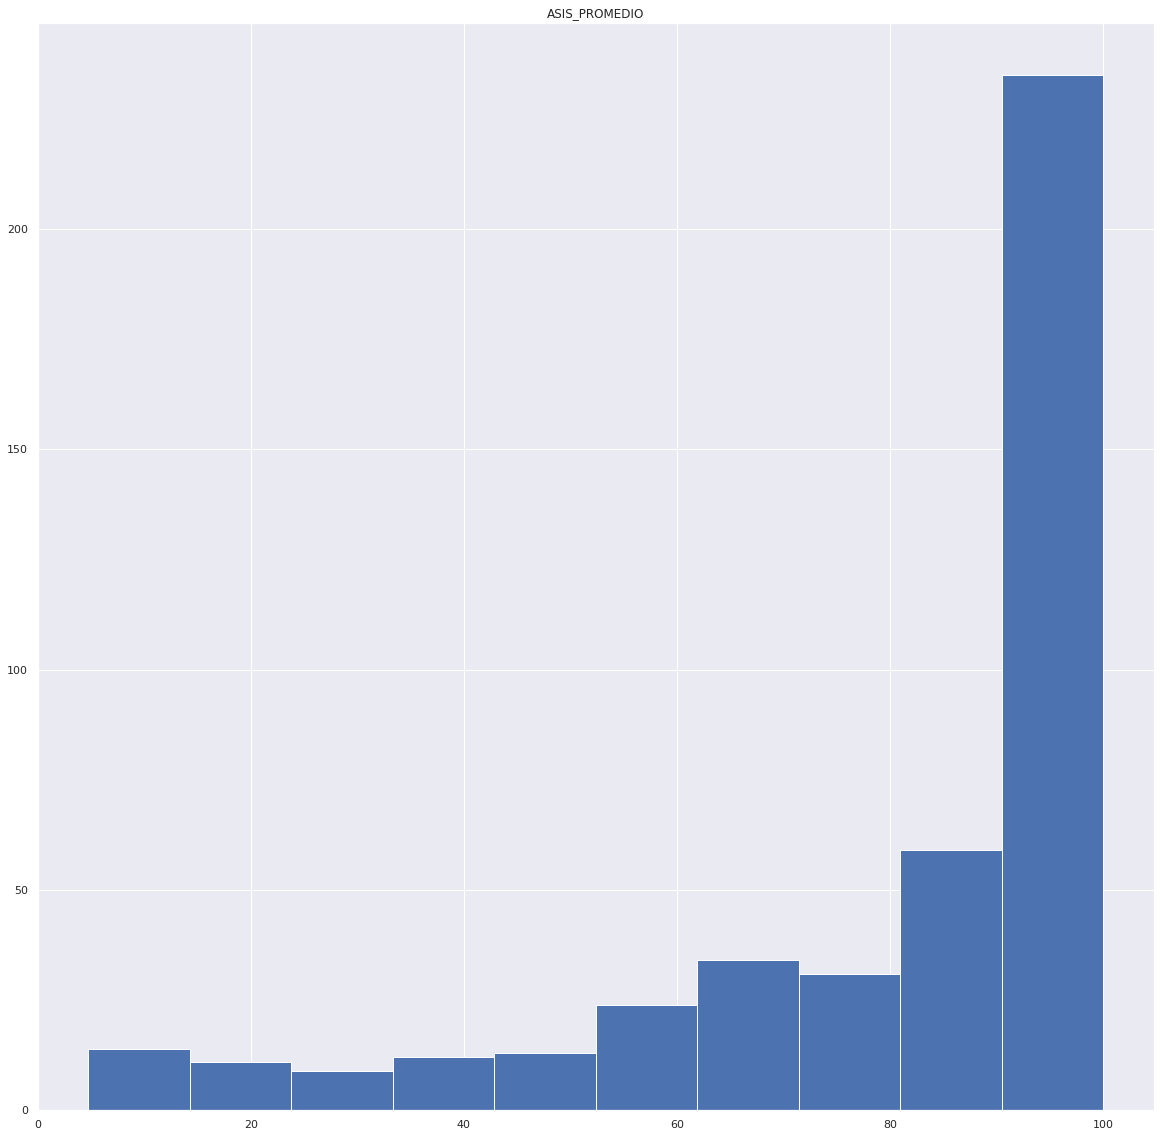

In [115]:
df.hist(column='ASIS_PROMEDIO')

In [102]:
df['APRUEBA_ASIGNATURA'] = df['ASIS_PROMEDIO'] >=85

(-10.0, 110.0)

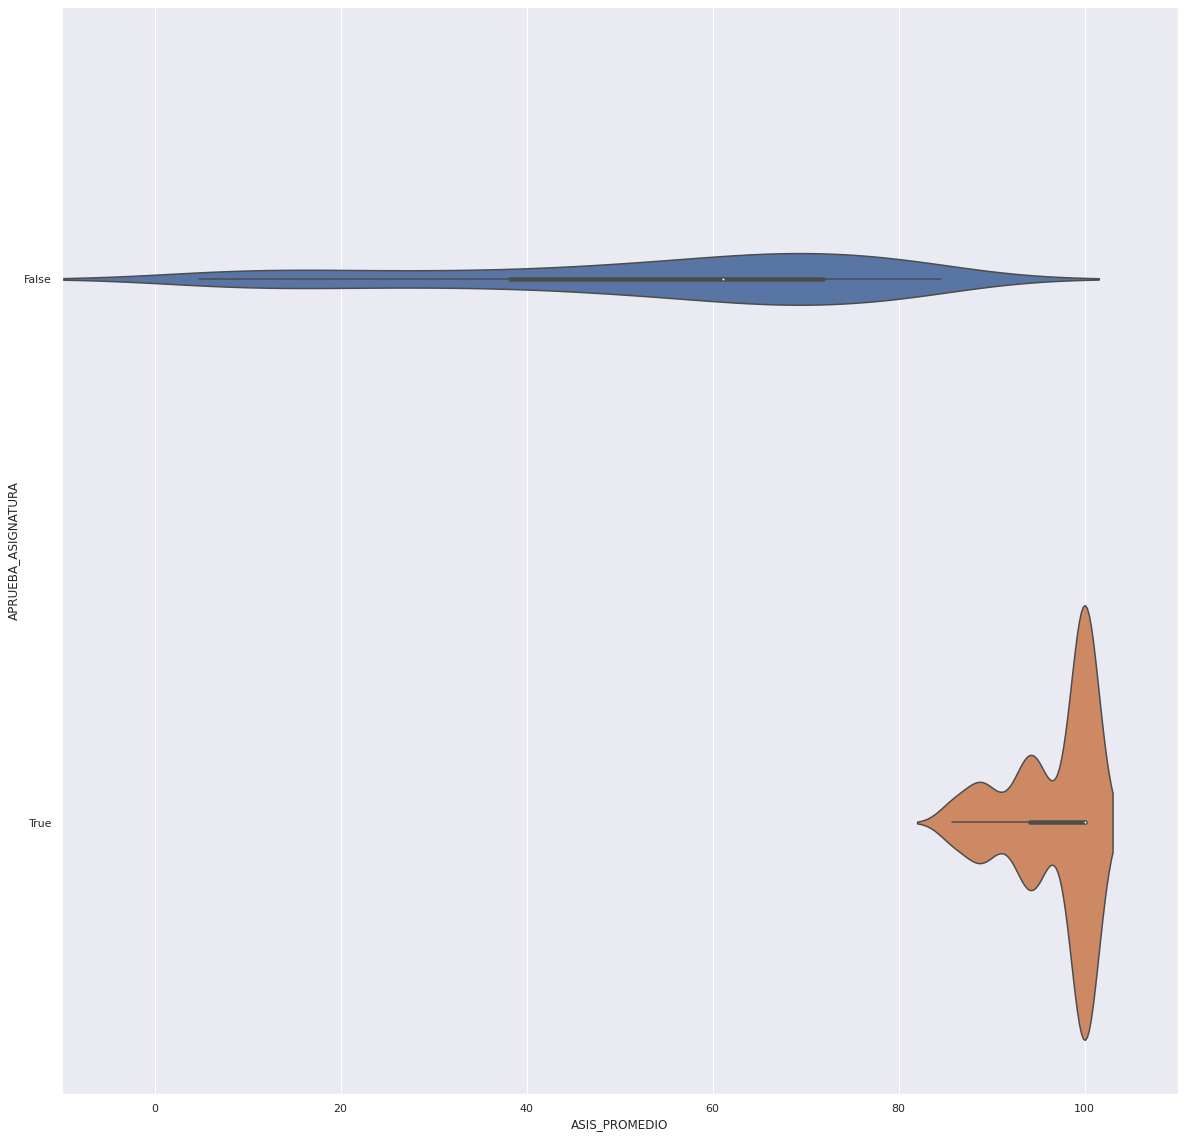

In [113]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(20, 20)})
ax = sns.violinplot(data=df, x='ASIS_PROMEDIO', y='APRUEBA_ASIGNATURA', inner='box', orient='h')
ax.set_xlim(-10, 110)

In [ ]:
df_ASIS_PROMEDIO_UP_90 = df[df['ASIS_PROMEDIO'] > 90]

In [ ]:
ax = df.plot(kind='line',
             x='ASIS_PROMEDIO',
             y='arrival_delay',
             yerr='stddev_arrival_delay');